In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


In [ ]:

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

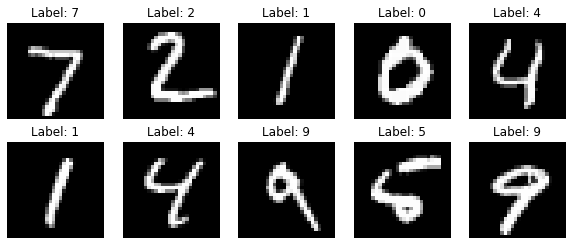

In [ ]:
# Plot 10 example images from the test set
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i in range(10):
    ax = axs[i//5, i%5]
    ax.imshow(x_test[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_test[i]))
    ax.axis('off')
plt.show()

In [ ]:

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:

# Define the neural network model
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10)
])

In [ ]:

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


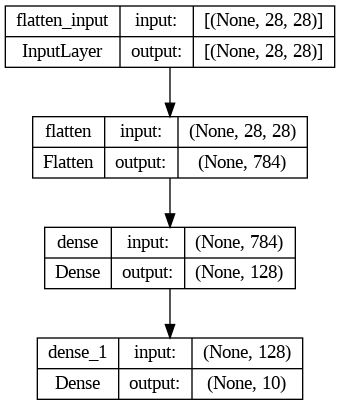

In [ ]:
plot_model(model, to_file='my_model.png', show_shapes=True)

In [ ]:

# Train the model
model.fit(x_train, y_train, epochs=10, verbose=1)


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2595 - accuracy: 0.9248
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1126 - accuracy: 0.9673
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0781 - accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0585 - accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0353 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0289 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0226 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0195 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

In [ ]:

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0845 - accuracy: 0.9769
Test accuracy: 0.9768999814987183


In [ ]:
from PIL import Image
import numpy as np


# Load the image from your computer
img = Image.open('six.png').convert('L')  # Convert to grayscale
img = img.resize((28, 28))  # Resize to the same size as MNIST images
img_array = np.array(img)  # Convert to numpy array
img_array = img_array / 255.0  # Scale the pixel values to [0, 1]
img_array = img_array.reshape(1, 28, 28)  # Reshape to match the input shape of the model

# Predict the label of the image
prediction = model.predict(img_array)

# Print the predicted label
print('The predicted label is:', np.argmax(prediction))

1/1 [==============================] - 0s 102ms/step
The predicted label is: 6
